In [26]:
#setting up 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 
from pprint import pprint 

#importing csv data variables 
international_drug_seizures_path = "seizures_1.csv"
world_data_path = "worlddata.csv"

drug_seizures = pd.read_csv(international_drug_seizures_path)
world_data = pd.read_csv(world_data_path)

#merge data
merged = pd.merge(drug_seizures, world_data, how='outer', on='country')
merged


Region                         country ISO Code     Drug Group  \
0      Africa                         Algeria      DZA  Cannabis-type   
1      Africa                         Algeria      DZA  Cannabis-type   
2      Africa                         Algeria      DZA  Cannabis-type   
3      Africa                         Algeria      DZA        Opioids   
4      Africa                         Algeria      DZA  Cannabis-type   
...       ...                             ...      ...            ...   
51216     NaN  St. Vincent and the Grenadines      NaN            NaN   
51217     NaN                           Syria      NaN            NaN   
51218     NaN                        Tanzania      NaN            NaN   
51219     NaN                     Timor-Leste      NaN            NaN   
51220     NaN                         Vietnam      NaN            NaN   

                   Drug    Year  KG Equivalent  electricity_access  \
0      Marijuana (herb)  1970.0          141.0               99.49   
1       Hashish (resin)  1970.0          140.0               99.49   
2      Marijuana (herb)  1980.0          240.0               99.49   
3                Heroin  1981.0            0.4               99.49   
4      Marijuana (herb)  1981.0           14.0               99.49   
...                 ...     ...            ...                 ...   
51216               NaN     NaN            NaN               99.79   
51217               NaN     NaN            NaN               88.87   
51218               NaN     NaN            NaN               31.51   
51219               NaN     NaN            NaN               77.12   
51220               NaN     NaN            NaN               99.61   

                gdp  gdp_capita  ...  air_pollution  population_density  \
0      1.680000e+11     4117.84  ...          100.0               17.10   
1      1.680000e+11     4117.84  ...          100.0               17.10   
2      1.680000e+11     4117.84  ...          100.0               17.10   
3      1.680000e+11     4117.84  ...          100.0               17.10   
4      1.680000e+11     4117.84  ...          100.0               17.10   
...             ...         ...  ...            ...                 ...   
51216  8.323060e+08     7866.97  ...          100.0              271.33   
51217  1.673330e+10      874.01  ...          100.0              104.13   
51218  5.185807e+10      964.88  ...          100.0               62.46   
51219  1.601170e+09     1298.28  ...          100.0               82.98   
51220  2.720000e+11     2903.81  ...          100.0              298.55   

        population  alcohol_consumption  unemployment_rate  social_support  \
0      40736509.00               0.5844             10.540           0.785   
1      40736509.00               0.5844             10.540           0.785   
2      40736509.00               0.5844             10.540           0.785   
3      40736509.00               0.5844             10.540           0.785   
4      40736509.00               0.5844             10.540           0.785   
...            ...                  ...                ...             ...   
51216    105818.75               7.0072             18.999             NaN   
51217  19121566.50               0.2900              8.745           0.464   
51218  55325525.00              11.6454              2.167           0.702   
51219   1233863.75               0.4733              4.645             NaN   
51220  93566326.25               8.8537              1.683           0.852   

       freedom  generosity         income_class    cpi  
0        0.510      -0.182  Lower middle income  34.50  
1        0.510      -0.182  Lower middle income  34.50  
2        0.510      -0.182  Lower middle income  34.50  
3        0.510      -0.182  Lower middle income  34.50  
4        0.510      -0.182  Lower middle income  34.50  
...        ...         ...                  ...    ...  
51216      NaN         NaN  Upper middle income  58.

In [27]:
#Hypothesis: Drug Seizures have increased in the last twenty years. 
#creating a data frame for drug seizures by year and weight
yearly_mean = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).mean()
yearly_median = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).median()
yearly_var = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).var()
yearly_std = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).std()
yearly_sem = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).sem()

yearly_summary = pd.DataFrame({'Yearly Mean' : yearly_mean, 'Yearly Median' : yearly_median, 'Yearly Variance': yearly_var, 'Yearly Std. Dev.' : yearly_std, 'Yearly Std. Err' : yearly_sem })
yearly_summary

Yearly Mean  Yearly Median  Yearly Variance  Yearly Std. Dev.  \
Year                                                                    
1970    1199.597605      73.000000     1.117103e+07      3.342308e+03   
1971      60.353074       2.056148     1.386919e+04      1.177675e+02   
1972     118.500000     118.500000     2.668050e+04      1.633417e+02   
1973     101.909189      32.000000     1.762164e+04      1.327465e+02   
1974      79.570219      39.740438     1.165770e+04      1.079708e+02   
1975      79.325122      24.100244     1.628612e+04      1.276171e+02   
1976      87.451673      17.000000     1.856301e+04      1.362461e+02   
1977     119.563216       2.150000     7.000246e+04      2.645798e+02   
1978      85.615981       2.500000     3.708416e+04      1.925725e+02   
1979     138.657958       3.000000     1.063043e+05      3.260433e+02   
1980   11627.964983       4.000000     1.649183e+10      1.284205e+05   
1981   13643.032116       4.000000     2.523467e+10      1.588543e+05   
1982   42360.126626       5.347065     5.450542e+11      7.382778e+05   
1983   89954.327111       4.595500     3.208629e+12      1.791265e+06   
1984  101913.925116       2.966500     2.489410e+12      1.577786e+06   
1985   11233.547775       3.476000     8.389382e+09      9.159357e+04   
1986   34406.960840       5.164000     2.309218e+11      4.805432e+05   
1987   83960.949148       4.698500     2.729788e+12      1.652207e+06   
1988   45342.150157       8.674500     4.331617e+11      6.581502e+05   
1989   22002.467745      10.498050     5.295717e+10      2.301242e+05   
1990   19271.406931      10.046000     4.404214e+10      2.098622e+05   
1991   13038.616827       8.843500     2.490722e+10      1.578202e+05   
1992   13522.300426      10.000000     2.808993e+10      1.676005e+05   
1993   24413.653520      16.217500     1.164355e+11      3.412265e+05   
1994   27614.524222      12.250000     2.367783e+11      4.865987e+05   
1995   25521.881489       6.939600     9.094664e+10      3.015736e+05   
1996  355576.819864      10.696510     1.192516e+14      1.092024e+07   
1997   25740.915036      10.293750     1.553530e+11      3.941485e+05   
1998   20170.955310       8.940000     5.132784e+10      2.265565e+05   
1999    8862.724999       7.196198     6.753923e+09      8.218226e+04   
2000    9767.988472       7.617577     1.120764e+10      1.058661e+05   
2001   10833.284051       8.237260     9.294316e+09      9.640703e+04   
2002   11015.701598       7.015000     1.059294e+10      1.029220e+05   
2003   16403.128324      11.812745     4.860563e+10      2.204668e+05   
2004   11398.521321      12.369000     1.084022e+10      1.041164e+05   
2005   10567.746908       9.862250     1.007563e+10      1.003774e+05   
2006   10057.589318      12.500000     7.579655e+09      8.706122e+04   
2007   32195.737253      10.350000     4.462785e+11      6.680408e+05   
2008   35724.449737      10.857537     5.630677e+11      7.503784e+05   
2009   58471.065490       8.136700     3.191815e+12      1.786565e+06   
2010   46366.722608       7.838675     1.935063e+12      1.391065e+06   
2011    9485.501437       5.229297     9.724990e+09      9.861537e+04   
2012    9901.805490       4.671225     8.664038e+09      9.308082e+04   
2013   13202.323745       4.610000     6.983730e+10      2.642675e+05   
2014    7072.341204       4.168745     3.101883e+09      5.569455e+04   
2015    8234.083183       3.000000     7.237217e+09      8.507183e+04   
2016    7990.406901       3.346000     6.034880e+09      7.768449e+04   
2017    6094.370745       2.985000     2.047516e+09      4.524949e+04   
2018    6730.671100       4.039000     2.531956e+09      5.031854e+04   
2019   11201.015295       5.020000     1.490529e+10      1.220872e+05   
2020   20222.890000   20280.660000     4.871167e+06      2.207072e+03   

      Yearly Std. Err  
Year                   
1970       643.227554  
1971        58.883768  
1972       115.500000  
1973        76.641

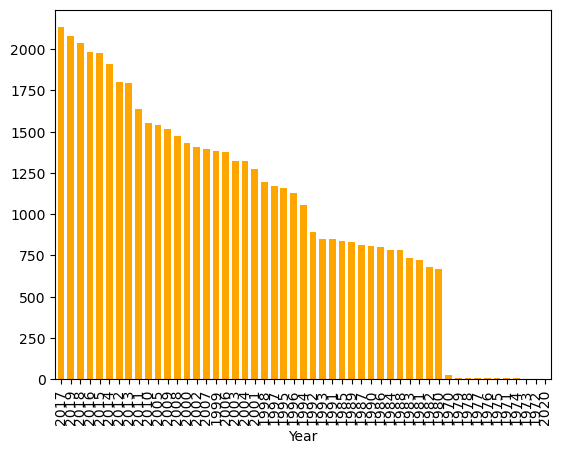

In [28]:
# bar plot for yearly drug seizures 
year_count = drug_seizures['Year'].value_counts()
year_bar = year_count.plot.bar(width = .7 ,color = 'orange', alpha = 1, linewidth = .8)

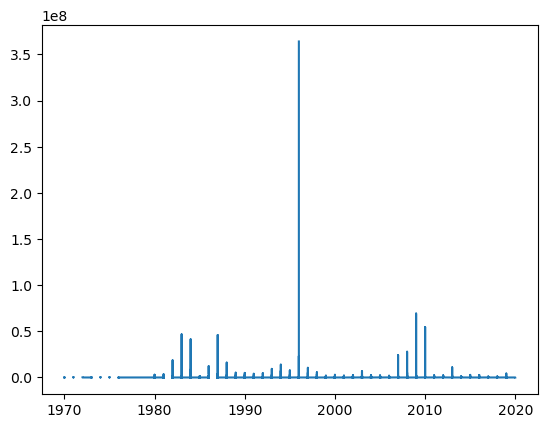

In [29]:
# creating a line graph for seizures per year 
year_line = plt.plot(drug_seizures['Year'],drug_seizures['KG Equivalent'])


<Axes: ylabel='count'>

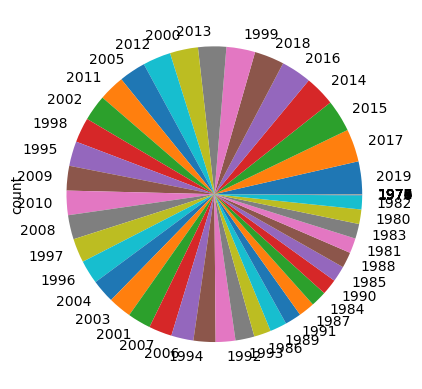

In [30]:
#creating pie charts to see what countries had the most active seizures in a couple of years 
drug_group = drug_seizures.loc[drug_seizures["Drug Group"]=="Opioids"]
year_pie = drug_group["Year"].value_counts()
year_pie.plot.pie()



<Axes: xlabel='country'>

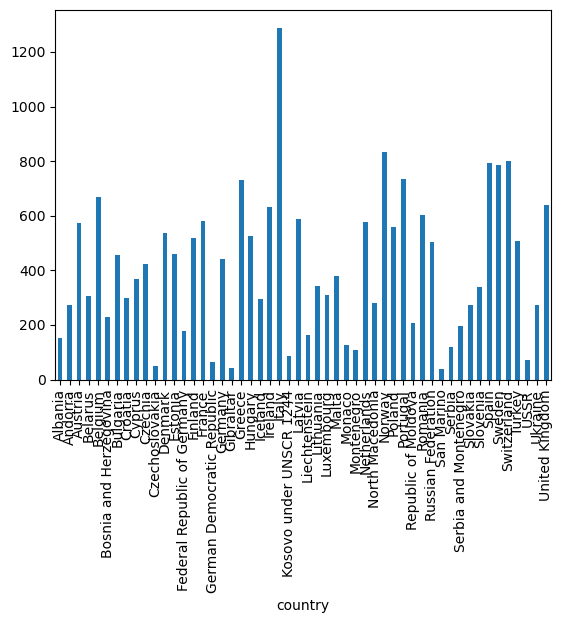

In [31]:
#dividing seizures by country 
drug_group = drug_seizures.loc[drug_seizures["Region"]=="Europe"].groupby("country")
country_pie = drug_group["country"].value_counts()
country_pie.plot.bar()


In [32]:
#creating a dataframe by country and drug group 
sweden = drug_seizures.loc[drug_seizures["country"]=="Sweden"]
opioids_sweden = sweden.loc[drug_seizures["Drug Group"]== "Opioids"]

opioids_sweden


Region country ISO Code Drug Group                    Drug  Year  \
24     Europe  Sweden      SWE    Opioids                  Heroin  1970   
27     Europe  Sweden      SWE    Opioids                  Heroin  1971   
32     Europe  Sweden      SWE    Opioids                  Heroin  1972   
36     Europe  Sweden      SWE    Opioids                  Heroin  1973   
39     Europe  Sweden      SWE    Opioids                  Heroin  1974   
...       ...     ...      ...        ...                     ...   ...   
49831  Europe  Sweden      SWE    Opioids  Pharmaceutical opioids  2019   
49832  Europe  Sweden      SWE    Opioids  Pharmaceutical opioids  2019   
49833  Europe  Sweden      SWE    Opioids  Pharmaceutical opioids  2019   
49834  Europe  Sweden      SWE    Opioids  Pharmaceutical opioids  2019   
49835  Europe  Sweden      SWE    Opioids  Pharmaceutical opioids  2019   

       KG Equivalent  
24          0.135330  
27               NaN  
32               NaN  
36               NaN  
39               NaN  
...              ...  
49831       5.166000  
49832      84.336551  
49833       0.194250  
49834       6.500000  
49835       0.450200  

[210 rows x 7 columns]

<Axes: ylabel='count'>

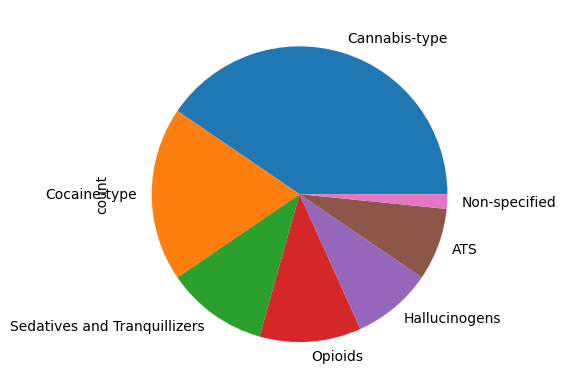

In [33]:
#diving the seizures by region 
#Americas 1976
americas = drug_seizures.loc[drug_seizures["Region"]=="Americas"]
year_americas = americas.loc[drug_seizures["Year"]== 1980]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()

<Axes: ylabel='count'>

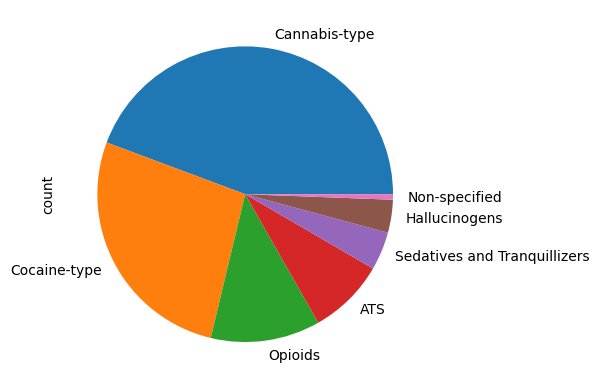

In [34]:
#Americas 1990
year_americas = americas.loc[drug_seizures["Year"]== 1990]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()

<Axes: ylabel='count'>

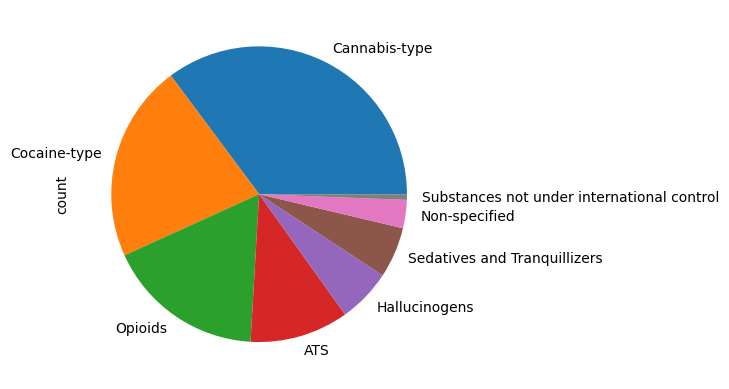

In [35]:
#Americas 2000
year_americas = americas.loc[drug_seizures["Year"]== 2000]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()

<Axes: ylabel='count'>

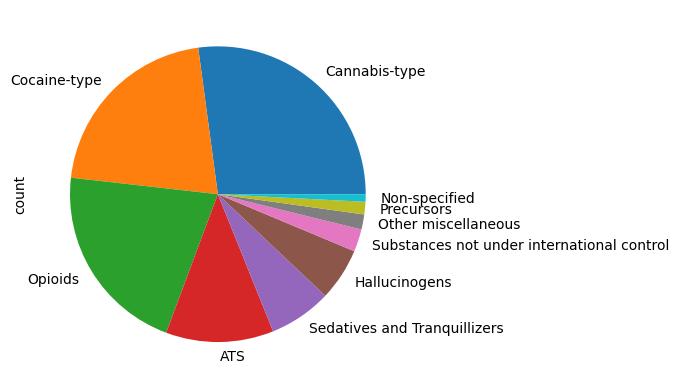

In [36]:
#Americas 2010
year_americas = americas.loc[drug_seizures["Year"]== 2010]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()

<Axes: ylabel='count'>

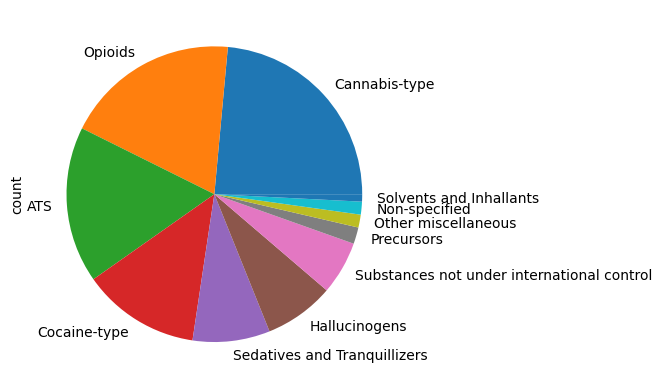

In [37]:
#Americas 2019
year_americas = americas.loc[drug_seizures["Year"]== 2019]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()

<Axes: ylabel='count'>

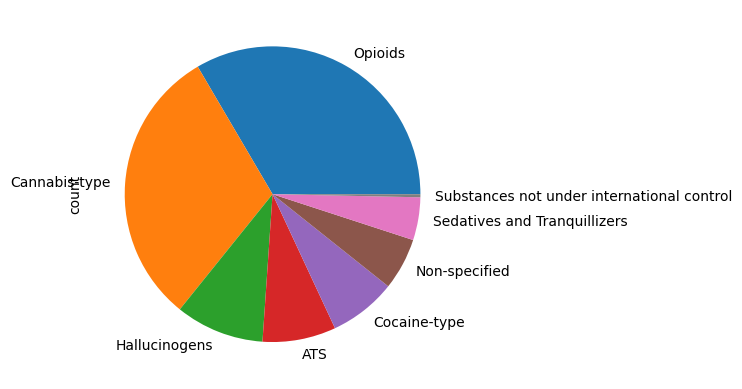

In [38]:
#europe 1980
europe = drug_seizures.loc[drug_seizures["Region"]=="Europe"]
year_europe = europe.loc[drug_seizures["Year"]== 1980]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()

<Axes: ylabel='count'>

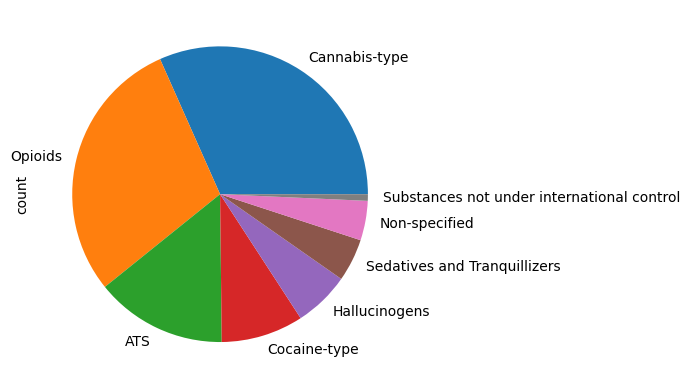

In [39]:
#europe 1990
year_europe = europe.loc[drug_seizures["Year"]== 1990]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()

<Axes: ylabel='count'>

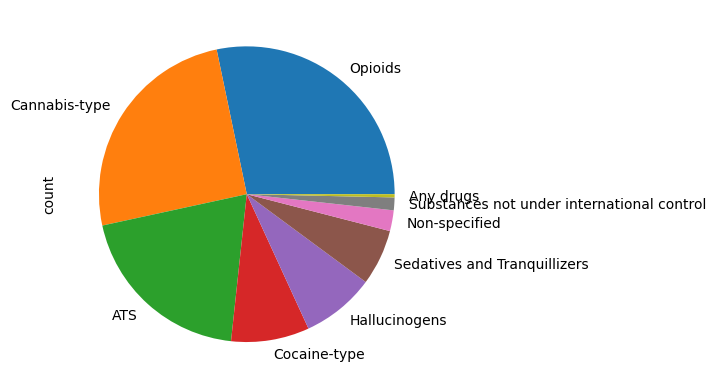

In [40]:
#europe 2000
year_europe = europe.loc[drug_seizures["Year"]== 2000]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()

<Axes: ylabel='count'>

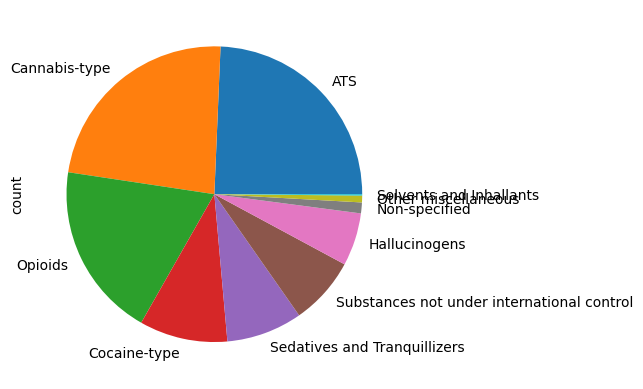

In [41]:
#europe 2010
year_europe = europe.loc[drug_seizures["Year"]== 2010]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()

<Axes: ylabel='count'>

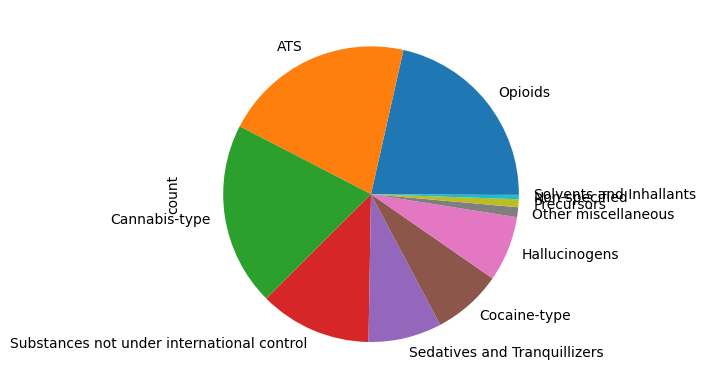

In [42]:
#europe 2019
year_europe = europe.loc[drug_seizures["Year"]== 2019]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()

In [79]:
#Create a Data Frame just for Opioid Seizures 
opioid_df = pd.DataFrame(merged.loc[merged["Drug Group"]=="Opioids"])
opioid_df

Region  country ISO Code Drug Group                    Drug    Year  \
3      Africa  Algeria      DZA    Opioids                  Heroin  1981.0   
18     Africa  Algeria      DZA    Opioids            Poppy plants  1987.0   
29     Africa  Algeria      DZA    Opioids                  Heroin  1991.0   
33     Africa  Algeria      DZA    Opioids                   Opium  1992.0   
37     Africa  Algeria      DZA    Opioids                  Heroin  1993.0   
...       ...      ...      ...        ...                     ...     ...   
51187    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2017.0   
51191    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2018.0   
51192    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2018.0   
51196    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2019.0   
51197    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2019.0   

       KG Equivalent  electricity_access           gdp  gdp_capita  ...  \
3           0.400000               99.49  1.680000e+11     4117.84  ...   
18         37.300000               99.49  1.680000e+11     4117.84  ...   
29         18.353001               99.49  1.680000e+11     4117.84  ...   
33          0.653000               99.49  1.680000e+11     4117.84  ...   
37          0.028000               99.49  1.680000e+11     4117.84  ...   
...              ...                 ...           ...         ...  ...   
51187       6.515800               98.09  2.264951e+09     3006.65  ...   
51191      14.700000               98.09  2.264951e+09     3006.65  ...   
51192       4.475250               98.09  2.264951e+09     3006.65  ...   
51196      33.300000               98.09  2.264951e+09     3006.65  ...   
51197       4.303950               98.09  2.264951e+09     3006.65  ...   

       air_pollution  population_density  population  alcohol_consumption  \
3              100.0               17.10  40736509.0               0.5844   
18             100.0               17.10  40736509.0               0.5844   
29             100.0               17.10  40736509.0               0.5844   
33             100.0               17.10  40736509.0               0.5844   
37             100.0               17.10  40736509.0               0.5844   
...              ...                 ...         ...                  ...   
51187          100.0               19.74    752813.0               0.3241   
51191          100.0               19.74    752813.0               0.3241   
51192          100.0               19.74    752813.0               0.3241   
51196          100.0               19.74    752813.0               0.3241   
51197          100.0               19.74    752813.0               0.3241   

       unemployment_rate  social_support  freedom  generosity  \
3                 10.540           0.785     0.51      -0.182   
18                10.540           0.785     0.51      -0.182   
29                10.540           0.785     0.51      -0.182   
33                10.540           0.785     0.51      -0.182   
37                10.540           0.785     0.51      -0.182   
...                  ...             ...      ...         ...   
51187              2.908           0.848     0.83       0.287   
51191              2.908           0.848     0.83       0.287   
51192              2.908           0.848     0.83       0.287   
51196              2.908           0.848     0.83       0.287   
51197              2.908           0.848     0.83       0.287   

              income_class    cpi  
3      Lower middle income  34.50  
18     Lower middle income  34.50  
29     Lower middle income  34.50  
33     Lower middle income  34.50  
37     Lower middle income  34.50  
...                    ...    ...  
51187  Lower middle income  66.25  
51191  Lower middle income  66.25  
51192  Lower middle income  66.25  
51196  Lower middle income  66.25  
51197  Lower middle income  66.25  

[12449 rows x 26 columns]

In [91]:
# Calculate the opioids seizure rate by region
region_list = ["Americas", "Africa", "Europe", "Asia", "Oceania"]
region = opioid_df[opioid_df["Region"].isin(region_list)]
region

Region  country ISO Code Drug Group                    Drug    Year  \
3      Africa  Algeria      DZA    Opioids                  Heroin  1981.0   
18     Africa  Algeria      DZA    Opioids            Poppy plants  1987.0   
29     Africa  Algeria      DZA    Opioids                  Heroin  1991.0   
33     Africa  Algeria      DZA    Opioids                   Opium  1992.0   
37     Africa  Algeria      DZA    Opioids                  Heroin  1993.0   
...       ...      ...      ...        ...                     ...     ...   
51187    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2017.0   
51191    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2018.0   
51192    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2018.0   
51196    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2019.0   
51197    Asia   Bhutan      BTN    Opioids  Pharmaceutical opioids  2019.0   

       KG Equivalent  electricity_access           gdp  gdp_capita  ...  \
3           0.400000               99.49  1.680000e+11     4117.84  ...   
18         37.300000               99.49  1.680000e+11     4117.84  ...   
29         18.353001               99.49  1.680000e+11     4117.84  ...   
33          0.653000               99.49  1.680000e+11     4117.84  ...   
37          0.028000               99.49  1.680000e+11     4117.84  ...   
...              ...                 ...           ...         ...  ...   
51187       6.515800               98.09  2.264951e+09     3006.65  ...   
51191      14.700000               98.09  2.264951e+09     3006.65  ...   
51192       4.475250               98.09  2.264951e+09     3006.65  ...   
51196      33.300000               98.09  2.264951e+09     3006.65  ...   
51197       4.303950               98.09  2.264951e+09     3006.65  ...   

       air_pollution  population_density  population  alcohol_consumption  \
3              100.0               17.10  40736509.0               0.5844   
18             100.0               17.10  40736509.0               0.5844   
29             100.0               17.10  40736509.0               0.5844   
33             100.0               17.10  40736509.0               0.5844   
37             100.0               17.10  40736509.0               0.5844   
...              ...                 ...         ...                  ...   
51187          100.0               19.74    752813.0               0.3241   
51191          100.0               19.74    752813.0               0.3241   
51192          100.0               19.74    752813.0               0.3241   
51196          100.0               19.74    752813.0               0.3241   
51197          100.0               19.74    752813.0               0.3241   

       unemployment_rate  social_support  freedom  generosity  \
3                 10.540           0.785     0.51      -0.182   
18                10.540           0.785     0.51      -0.182   
29                10.540           0.785     0.51      -0.182   
33                10.540           0.785     0.51      -0.182   
37                10.540           0.785     0.51      -0.182   
...                  ...             ...      ...         ...   
51187              2.908           0.848     0.83       0.287   
51191              2.908           0.848     0.83       0.287   
51192              2.908           0.848     0.83       0.287   
51196              2.908           0.848     0.83       0.287   
51197              2.908           0.848     0.83       0.287   

              income_class    cpi  
3      Lower middle income  34.50  
18     Lower middle income  34.50  
29     Lower middle income  34.50  
33     Lower middle income  34.50  
37     Lower middle income  34.50  
...                    ...    ...  
51187  Lower middle income  66.25  
51191  Lower middle income  66.25  
51192  Lower middle income  66.25  
51196  Lower middle income  66.25  
51197  Lower middle income  66.25  

[12449 rows x 26 columns]

In [92]:
# calculating the largest seizures by country 
last = region.groupby(['Region', 'country']).agg(seizure = ('KG Equivalent', lambda x: x.iloc[-1] ))
last = last.stack(level=0).unstack(level=0)

In [93]:
for region in region_list:
    print(region)

Americas
Africa
Europe
Asia
Oceania


In [94]:
# putting seizures in a for loop for IQR Analysis 
count = 0
for region in region_list:
    quartiles = last[region].quantile([.25,.5,.75]).round(2)
    lower_quartile = quartiles[0.25].round(2)
    upper_quartile = quartiles[0.75].round(2)
    interquartile_range = round(upper_quartile-lower_quartile,2)
    lower_outlier = round(lower_quartile - (1.5*interquartile_range),2)
    upper_outlier= round(upper_quartile + (1.5*interquartile_range),2)


    if count == 0:
        print(f"------------------------------------------------------------")
        print(f"{region} seizures IQR by kilogram :")
    print(f"The lower quartile: {lower_quartile}")
    print(f"The upper quartile: {upper_quartile}")
    print(f"The interquartile range: {interquartile_range}")
    print(f"Values below {lower_outlier} could be possible outliers.")
    print(f"Values above {upper_outlier} could be possible outliers.")
    print(f"------------------------------------------------------------")
   

------------------------------------------------------------
Americas seizures IQR by kilogram :
The lower quartile: 0.03
The upper quartile: 5.0
The interquartile range: 4.97
Values below -7.42 could be possible outliers.
Values above 12.46 could be possible outliers.
------------------------------------------------------------
------------------------------------------------------------
Africa seizures IQR by kilogram :
The lower quartile: 0.3
The upper quartile: 21.5
The interquartile range: 21.2
Values below -31.5 could be possible outliers.
Values above 53.3 could be possible outliers.
------------------------------------------------------------
------------------------------------------------------------
Europe seizures IQR by kilogram :
The lower quartile: 0.02
The upper quartile: 8.8
The interquartile range: 8.78
Values below -13.15 could be possible outliers.
Values above 21.97 could be possible outliers.
------------------------------------------------------------
-----------

In [ ]:
#calculating CPI vs Drug Seizures 

